# Machine Learning Python Demo1
This notebook demos a typical Machine Learning pipeline in Python using Pandas


In [15]:
# install and import Pandas library
!pip install Pandas --upgrade
import pandas
!pip install sklearn --upgrade
import sklearn

Requirement already up-to-date: Pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa7d-9dd5fbf856b6db-aa3b21eda791/.local/lib/python2.7/site-packages
Requirement already up-to-date: pytz>=2011k in /usr/local/src/bluemix_jupyter_bundle.v63/notebook/lib/python2.7/site-packages (from Pandas)
Requirement already up-to-date: numpy>=1.7.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa7d-9dd5fbf856b6db-aa3b21eda791/.local/lib/python2.7/site-packages (from Pandas)
Requirement already up-to-date: python-dateutil in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa7d-9dd5fbf856b6db-aa3b21eda791/.local/lib/python2.7/site-packages (from Pandas)
Requirement already up-to-date: six>=1.5 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa7d-9dd5fbf856b6db-aa3b21eda791/.local/lib/python2.7/site-packages (from python-dateutil->Pandas)
    100% |████████████████████████████████| 12.2MB 100kB/s eta 0:00:01


In [4]:
# The code was removed by DSX for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# copy into new variable
df = df_data_1
# check for missing or null values (NaN)
pd.isnull(df).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [12]:
# drop rows where any column is missing or null
df2 = df.dropna()
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [14]:
# group by
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
# import boston house prices dataset from sklearn.datasets
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [18]:
# identify target and data (features)
X, y = boston.data, boston.target
n_samples, n_features = X.shape
print(n_samples, n_features)
print(boston.feature_names)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


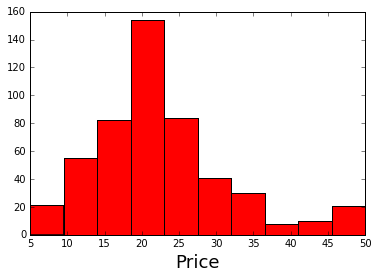

In [22]:
# plot data
import matplotlib.pyplot as plt
plt.hist(y)
plt.xlabel("Price",fontsize=18)
plt.show()

In [24]:
# put the data into a pandas dataframe
df = pd.DataFrame(X,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
# use a linear regression model from SciKit
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_.shape)

36.4911032804
(13,)


In [30]:
# let's fit the model on half the data and predict on the other half
# the [:::] notation is python extended slicing [start:end:skip]
model.fit(X[::2],y[::2])
# let's score the odd row and get R2
# R2 is coefficient of determination shows how good is the model. 1.0 is the heightes value
print("R2 scorce : %s"% model.score(X[1::2],y[1::2]))

R2 scorce : 0.744395023361


In [32]:
# list all linear models in SciKit
from sklearn import linear_model
dir(linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '__warningregistry__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',
 'least_angle',
 '

In [ ]:
# let's try the Ridge algorithm
# Ridge is a Linear least squares algorithm
from sklearn.linear_model import Ridge
# alpha is Regularization strength; must be a positive float
model = Ridge(alpha=0.1)
model.fit(X,y)
print(model.intercept_)
print(model.coef_.shape)
# let's fit the model on half the data and predict on the other half
# the [:::] notation is python extended slicing [start:end:skip]
model.fit(X[::2],y[::2])
# let's score the odd row and get R2
# R2 is coefficient of determination shows how good is the model. 1.0 is the heightes value
print("R2 scorce : %s"% model.score(X[1::2],y[1::2]))